In [6]:
# Copyright (c) https://albara.ramli.net
# This code is authored by Albara Ah Ramli
# All rights reserved.

# If you use this code, please cite the following paper:
# @misc{ramli2023walk4me,
#     title={Walk4Me: Telehealth Community Mobility Assessment, An Automated System for Early Diagnosis and Disease Progression},
#     author={Albara Ah Ramli and Xin Liu and Erik K. Henricson},
#     year={2023},
#     eprint={2305.05543},
#     archivePrefix={arXiv},
#     primaryClass={eess.SP}
# }



# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppressing warnings
warnings.filterwarnings("ignore")

# Function to flip a binary bit
def flip(bit):
    return '1' if bit == '0' else '0'

# Function to compute the two's complement of a binary number
def scom(binary_str):
    # Compute the one's complement
    ones = ''.join(flip(bit) for bit in binary_str)
    twos = list(ones)

    # Compute the two's complement
    for i in range(len(binary_str) - 1, -1, -1):
        if ones[i] == '1':
            twos[i] = '0'
        else:
            twos[i] = '1'
            break

    # If all bits were '1', insert an additional '1' at the beginning
    if i == -1:
        twos.insert(0, '1')

    return ''.join(twos)


def hp3_read(url):
  results=[]
  print_out=0
  f = open(url, "r")
  i=0
  for x in f:
    x=x.replace("\n","")
    i=i+1
    if i==19:
      x=x.replace("<calibration_order>","")
      if print_out==1:
        print("***************************************")
      calibration_order=x.split(",")
      if print_out==1:
        print(calibration_order)
    if i==20:
      x=x.replace("<calibration_data>","")
      #print(x)
      calibration_data=x.split(",")
      if print_out==1:
        print(calibration_data)
        print("***************************************")
    if i==21:
      calibration={}
      n=0
      for calibration_i in calibration_order:
        calibration[calibration_i]=int(calibration_data[n])
        n=n+1
    ################################################################################
    ################################################################################
    ################################################################################
    TTT=23
    if (i==TTT) or (i>TTT and (i%3)==2):
      x=x.replace("\n","").replace("N:","").split("_")
      index=x[0]
      #print("",index)
      millesecond=int(x[1][0:2], 16)
      seconds=int(x[1][2:5], 16)
      timex=str(seconds)+"."+str(millesecond)
      #print(timex)
    ################################################################################
    ################################################################################
    ################################################################################
    if i>=TTT+1 and (i>TTT+1 and (i%3)!=2):
      #x="R1094F90C73A30E75A703FFAB"
      #x="L1181AD039DDA0F5846"
      #x="R6BA577563257574EBE57F15DFFFD4857260800B7A0"
      side=x[0:1]
      if print_out==1:
        print("===========================")
        print(x)
        print("===========================")
      l=6
      a=1
      b=a+l
      for x_i in range(1,7+1):
        ori="*"
        if print_out==1:
          print("Hexa=",x[a:b])
        out=""
        out=out+"{0:04b}".format(int(x[a+0:a+1], 16))
        out=out+"{0:04b}".format(int(x[a+1:a+2], 16))
        out=out+"{0:04b}".format(int(x[a+2:a+3], 16))
        out=out+"{0:04b}".format(int(x[a+3:a+4], 16))
        out=out+"{0:04b}".format(int(x[a+4:a+5], 16))
        out=out+"{0:04b}".format(int(x[a+5:a+6], 16))
        #print("Binary=",out)
        value=int(out, 2)
        if print_out==1:
          print("Int=",value)
        outx=scom(out.strip(""))
        outx=''.join(outx)
        #print("2nd complements = ",outx)
        #print("20 bit acc=",outx[0:20])
        #print("4bit remains=",outx[20:24])
        a=b
        b=a+l
        if x_i==1:
          if print_out==1:
            print("(x-axis) Vertical acceleration")
          ori="X"
          value_x=value
        if x_i==2:
          if print_out==1:
            print("(y-axis) Anterior-Posterior acceleration")
          ori="Y"
          value_y=value
        if x_i==3:
          if print_out==1:
            print("(z-axis) Lateral acceleration")
          ori="Z"
          value_z=value
        if ori!="*":
          if side=="R" and ori=="X":
            vmax_name=side+ori+"_MAX"
          else:
            vmax_name=side+ori+"_max"
          vmax_value=calibration[vmax_name]
          if print_out==1:
            print(vmax_name,vmax_value)
        if x_i==4:
          if print_out==1:
            print("ECG")
          ecg=value
        if x_i==5:
          if print_out==1:
            print("PPG")
          ppg=value
        if x_i==6:
          if print_out==1:
            print("Vref from left ADC")
          vref=value
          if side=="L":
            acc_x=(value_x-vref)/calibration[side+'X_max']
          else:
            acc_x=(value_x-vref)/calibration[side+'X_MAX']
          acc_y=(value_y-vref)/calibration[side+'Y_max']
          acc_z=(value_z-vref)/calibration[side+'Z_max']
          ecg_value=(ecg-vref)
          if print_out==1:
            print("Vref=",value)
          if print_out==1:
            print("Side=",side," Time=",timex,"Acc_X=",acc_x," Acc_Y=",acc_y," Acc_Z=",acc_z," PPG=",ppg," ECG=",ecg," INDEX=",index)
          results.append([side,timex,acc_x,acc_y,acc_z,ppg,ecg_value,index])
        if x_i==7:
          if x[0:1]=="L":
            if print_out==1:
              print("Battery level")
          if x[0:1]=="R":
            if print_out==1:
              print("Square wave for time calibration")
        if print_out==1:
          print("====================================")
  #######################
  df=pd.DataFrame(results,columns=["side","timex","acc_x","acc_y","acc_z","ppg","ecg","index"])
  #df['index2']=df['index']
  #df=df.set_index('index')
  #df=df.set_index('index')
  #df=df.sort_values(by=['timex'])
  iii=0
  ########################
  df["timex"]=df["timex"].astype(float)
  df["acc_x"]=df["acc_x"].astype(float)
  df["acc_y"]=df["acc_y"].astype(float)
  df["acc_z"]=df["acc_z"].astype(float)
  df["ppg"]=df["ppg"].astype(float)
  df["ecg"]=df["ecg"].astype(float)
  df["index"]=df["index"].astype(int)
  df=df.sort_values(by=['index'], ascending=True)
  df.reset_index(drop=True, inplace=True)
  return df

# Function to remove drift in the data for a single axis
def hp3_remove_drift_single(zzz, letx, base):
    # Create a copy of the DataFrame
    xxx = zzz.copy()

    # Calculate the rolling mean (trend) of acceleration data for the specified axis
    trend = zzz["acc_" + letx].rolling(base).mean().to_frame()
    trend.columns = ["trend_" + letx]  # Rename the column to indicate it's the trend
    trend.reset_index(drop=True, inplace=True)  # Reset index for alignment

    # Reset index of the original DataFrame for alignment
    xxx.reset_index(drop=True, inplace=True)

    # Add trend and new acceleration data columns to the DataFrame
    xxx["trend_" + letx] = trend["trend_" + letx]
    xxx["new_acc_" + letx] = xxx["acc_" + letx] - trend["trend_" + letx]

    return xxx


# Function to remove drift in the data for all three axes
def hp3_remove_drift(zzz, base=50):
    # Iterate over each axis (x, y, z)
    for axis in ["x", "y", "z"]:
        # Call hp3_remove_drift_single to remove drift for the current axis
        zzz = hp3_remove_drift_single(zzz, axis, base)
    return zzz


# Function to draw the original, trend, and new acceleration data before and after removing drift
def draw_drift(out):
    # Define colors for each axis
    colors = {"x": "blue", "y": "orange", "z": "green"}

    # Iterate over each axis (x, y, z)
    for axis in ["x", "y", "z"]:
        # Print axis information
        print(f"{axis}-axis before and after")

        # Create subplots for original, trend, and new acceleration data
        fig, ax = plt.subplots(nrows=2, figsize=(22, 6))

        # Plot original and trend data
        out.plot(x="index", y=[f"acc_{axis}", f"trend_{axis}"], ax=ax[0], color=[colors[axis], 'red'])
        ax[0].set_title("Original and Trend Data")
        ax[0].legend([f"acc_{axis}", f"trend_{axis}"])

        # Plot new acceleration data
        out.plot(x="index", y=f"new_acc_{axis}", ax=ax[1], color=colors[axis])
        ax[1].set_title("New Acceleration Data")
        ax[1].legend([f"new_acc_{axis}"])

        # Add vertical space between subplots
        plt.subplots_adjust(hspace=0.5)

        # Display the plots
        plt.show()


## **Reading and Displaying the Contents of an HP3 File**

In [8]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from hp3 import hp3_read

#pip3 install matplotlib
#pip3 install pandas

url="HP_-000_2021-05-14T14-13-52-47_000.hp3"
#url="HP_S2-232_2021-11-03T14-33-16-4_000.hp4"
df=hp3_read(url)
print(df)


      side  timex     acc_x     acc_y     acc_z         ppg        ecg  index
0        R  83.16  0.122135  0.095760  0.046530  16776381.0  -107161.0    251
1        L  83.17  0.126298 -0.101215  0.038709  16776419.0  -134806.0    252
2        R  83.17  0.121962  0.095923  0.047582  16776389.0  -130599.0    252
3        L  83.17  0.125942 -0.100518  0.038802  16776425.0  -125262.0    253
4        R  83.17  0.122511  0.095472  0.046868  16776398.0  -115873.0    253
...    ...    ...       ...       ...       ...         ...        ...    ...
71494    R  89.35  0.119487  0.095364  0.049709  16776399.0  1342598.0  35998
71495    L  89.35  0.126905 -0.103327  0.036284  16776407.0  -319993.0  35999
71496    R  89.35  0.119425  0.095610  0.049395  16776389.0  -803057.0  35999
71497    L  89.36  0.126711 -0.103122  0.035144  16776417.0 -1530059.0  36000
71498    R  89.36  0.119681  0.096291  0.048979  16776399.0 -1871929.0  36000

[71499 rows x 8 columns]


# **Splitting Data into Left and Right Sides**

In [3]:
LLL=df[df['side']=="L"]
RRR=df[df['side']=="R"]

# **Draw the Acceleration Signal, PPG, and ECG of the Left and Right Sides**


<Axes: xlabel='index'>

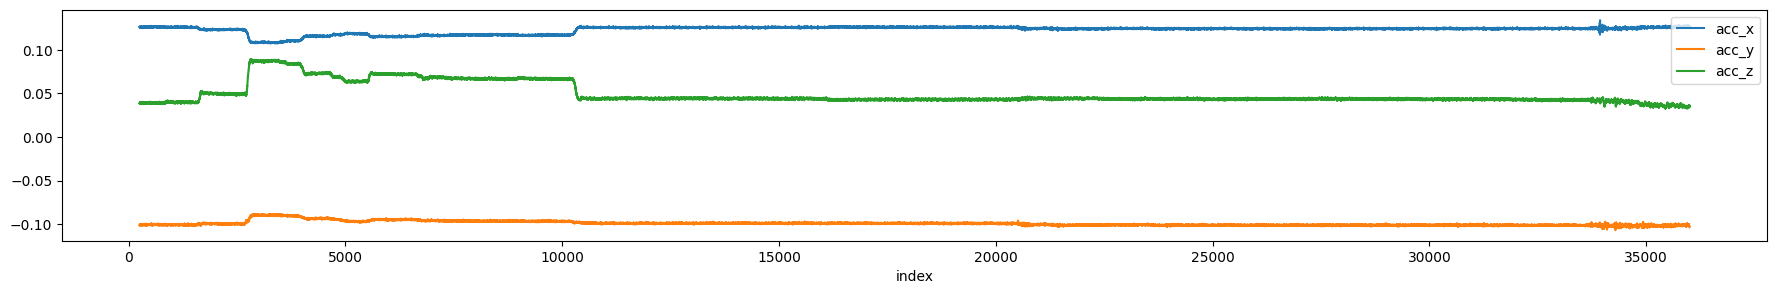

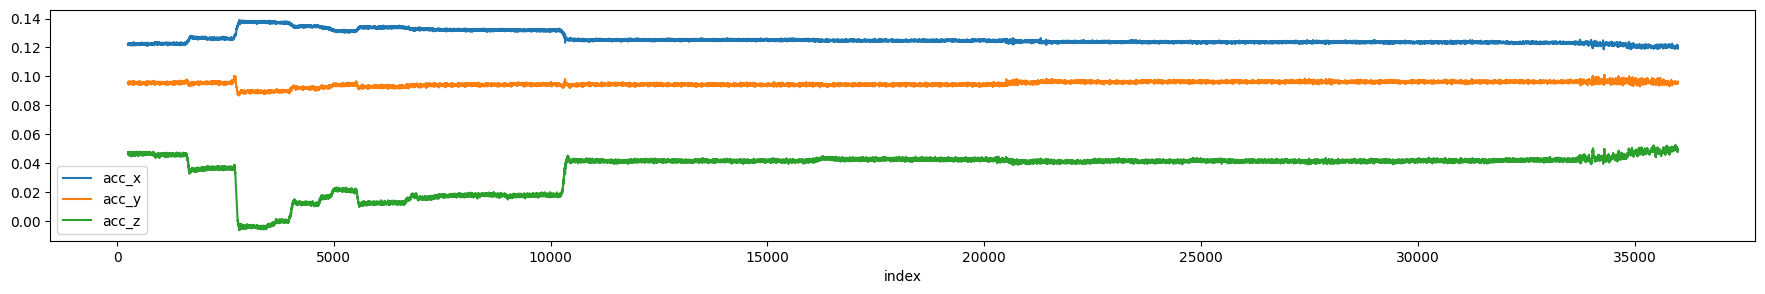

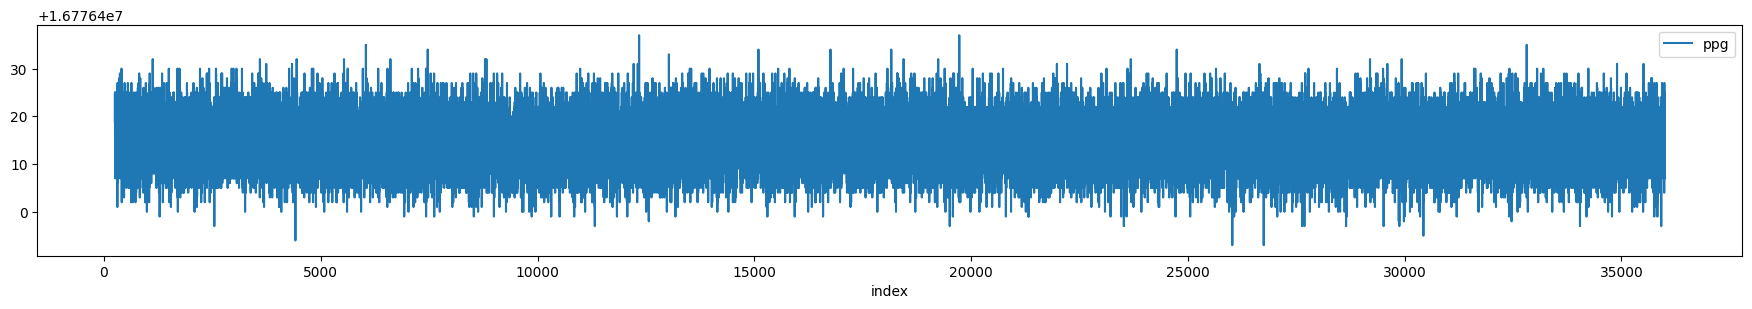

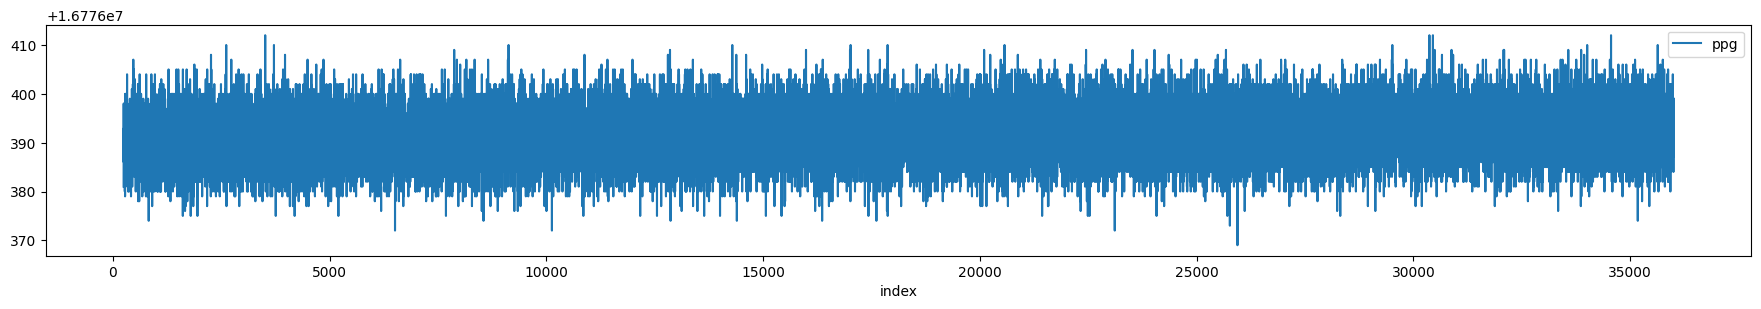

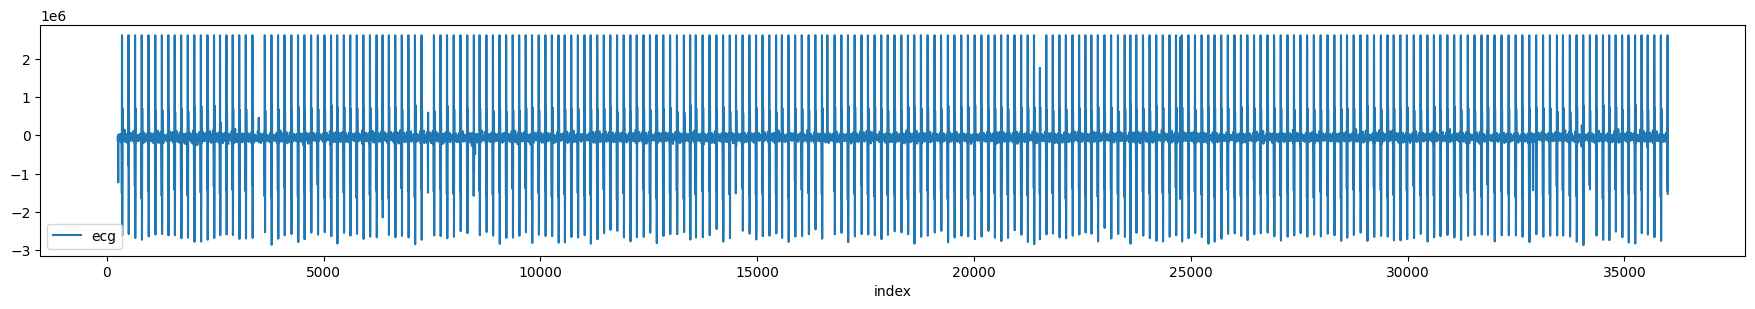

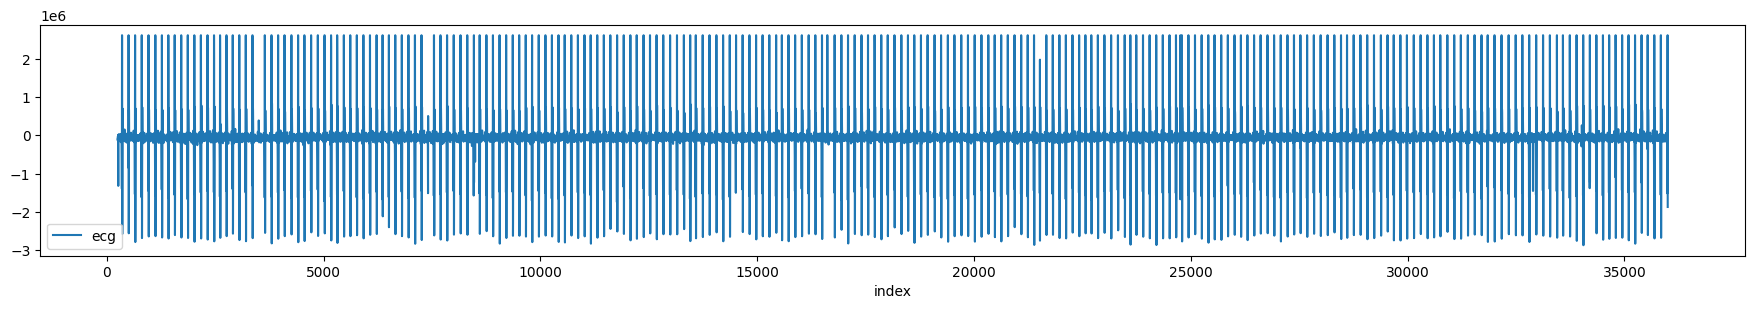

In [4]:
LLL.plot(x="index",y=["acc_x","acc_y","acc_z"],figsize=(22, 3))
RRR.plot(x="index",y=["acc_x","acc_y","acc_z"],figsize=(22, 3))

LLL.plot(x="index",y=["ppg"],figsize=(22, 3))
RRR.plot(x="index",y=["ppg"],figsize=(22, 3))

LLL.plot(x="index",y=["ecg"],figsize=(22, 3))
RRR.plot(x="index",y=["ecg"],figsize=(22, 3))

# **Remove the Drift in the Acceleration Signal of the Left Side and Draw the Signal Before and After**

,side,timex,acc_x,acc_y,acc_z,ppg,ecg,index,trend_x,new_acc_x,trend_y,new_acc_y,trend_z,new_acc_z
0,L,83.17,0.126298,-0.101215,0.038709,16776419.0,-134806.0,252,NaN,NaN,NaN,NaN,NaN,NaN
1,L,83.17,0.125942,-0.100518,0.038802,16776425.0,-125262.0,253,NaN,NaN,NaN,NaN,NaN,NaN
2,L,83.18,0.126459,-0.100512,0.039283,16776425.0,-83849.0,254,NaN,NaN,NaN,NaN,NaN,NaN
3,L,83.36,0.126124,-0.101426,0.038952,16776414.0,-18552.0,255,NaN,NaN,NaN,NaN,NaN,NaN
4,L,83.36,0.126546,-0.101077,0.038855,16776419.0,-74361.0,256,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35744,L,89.34,0.126860,-0.103555,0.035057,16776413.0,2622194.0,35996,0.127151,-0.000291,-0.100969,-0.002586,0.034555,0.000502
35745,L,89.34,0.127176,-0.103630,0.035535,16776424.0,2622176.0,35997,0.127146,0.000030,-0.101054,-0.002575,0.034598,0.000936
35746,L,89.35,0.126833,-0.103701,0.034598,16776413.0,1861212.0,35998,0.127139,-0.000306,-0.101141,-0.002560,0.034610,-0.000012
35747,L,89.35,0.126905,-0.103327,0.036284,16776407.0,-319993.0,35999,0.127121,-0.000216,-0.101199,-0.002127,0.034666,0.001618


x-axis before and after


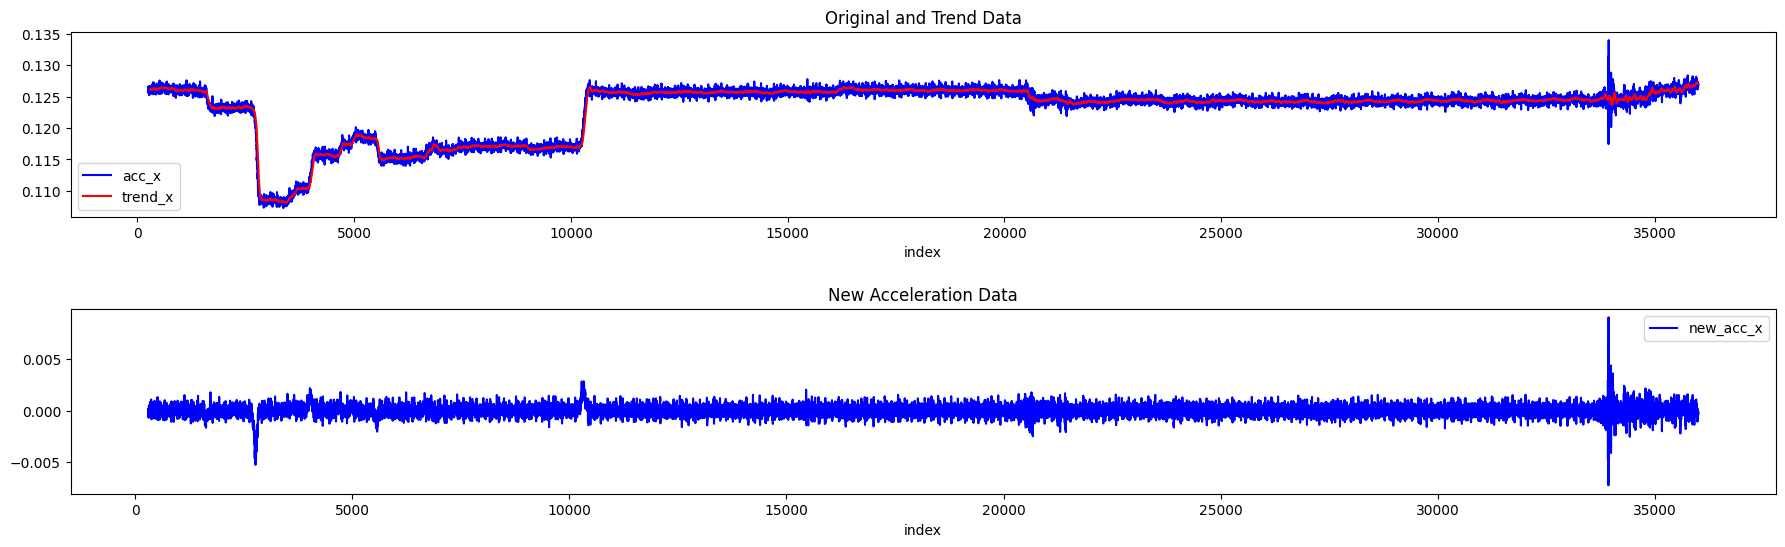

y-axis before and after


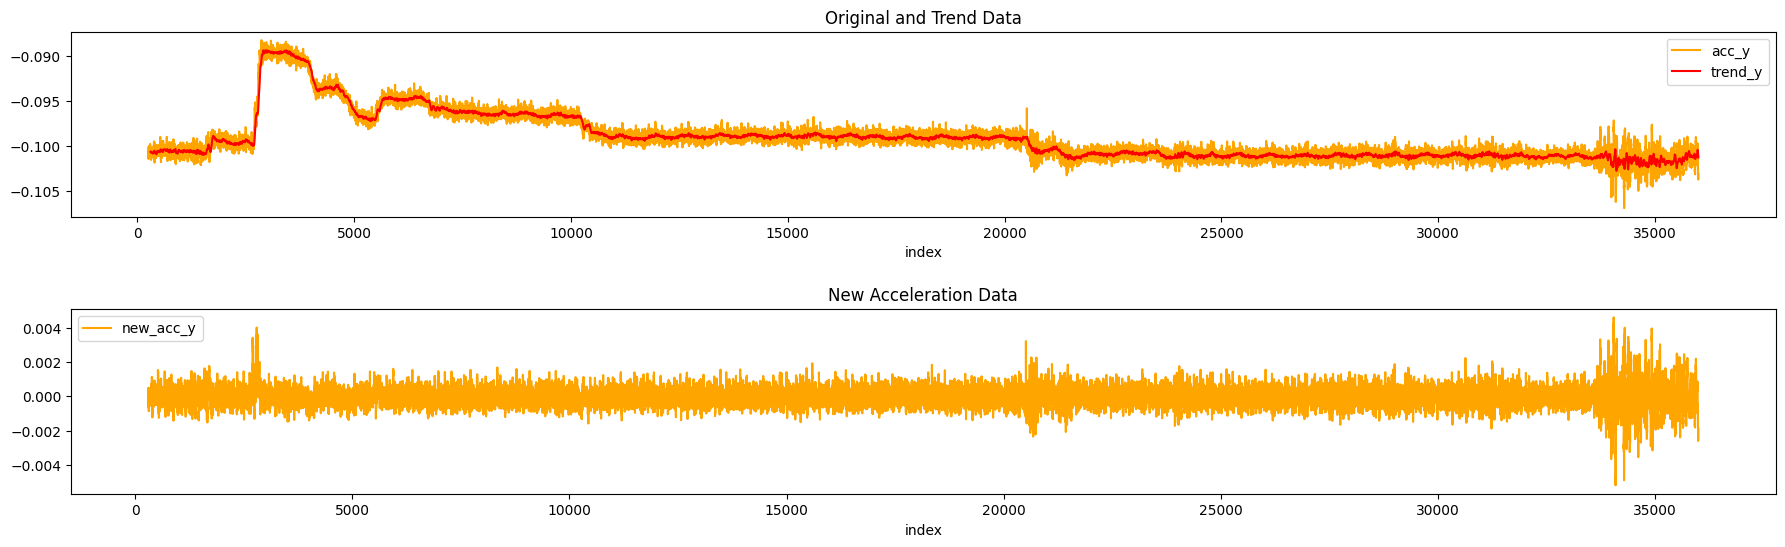

z-axis before and after


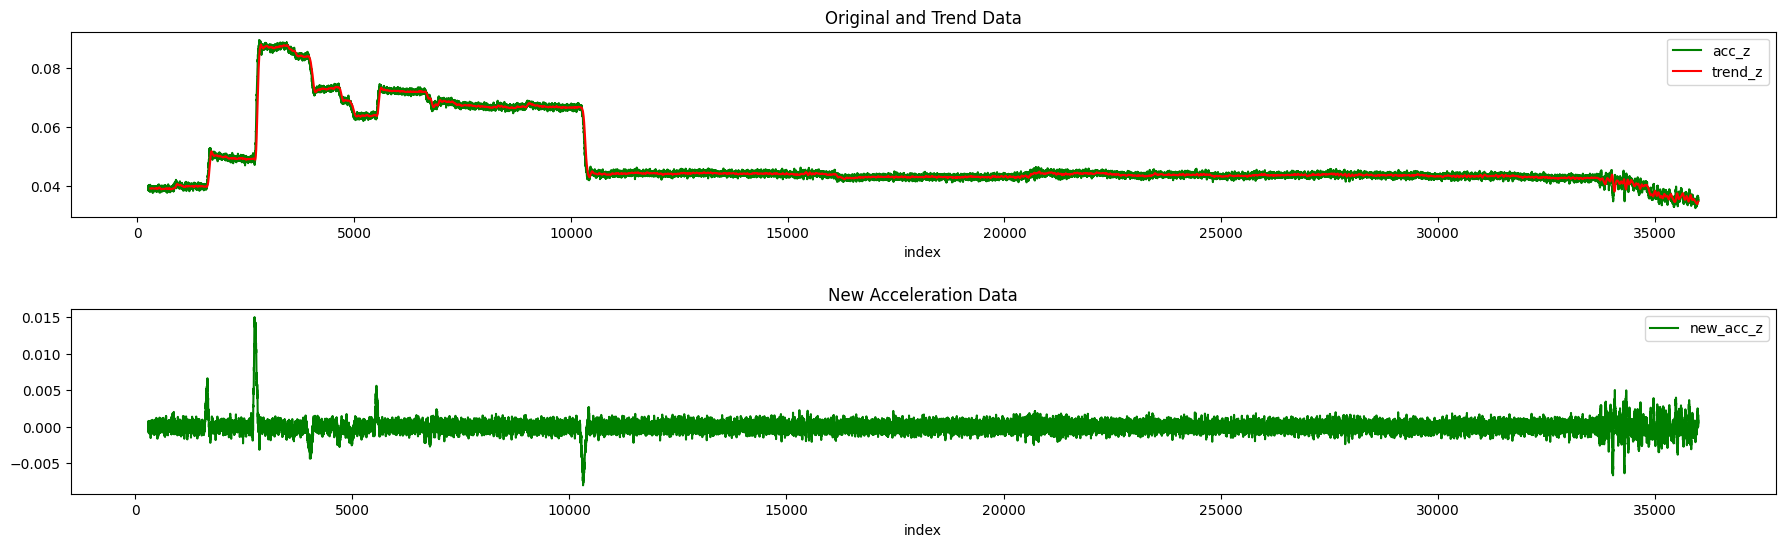

In [5]:
#remove the dreft
out=hp3_remove_drift(LLL,50)
#display the data after removeing the dreft
display(out)
#draw the signla before and after temvoing the dreft
draw_drift(out)


